The process of estimating model parameters $\pmb{\theta}$ from an observed dataset $D$ is called **model fitting or training**, and it is at the heart of machine learning. There are many methodologies to find such estimates but regardless of the methodology the problem can be expressed as follows: $$\hat{\pmb{\theta}}=\underset{\pmb{\theta}}{argmin}L(\pmb{\theta})$$ where $L(\pmb{\theta})$ is loss function or objective function. An important estimation methodology is called maximum likelihood estimation which we disucess in this post. We will cover definition of maximum likelihood estimation and give validation to its usage. Then we will give examples of common estimation use cases. Lastly we will apply what we learnt from this post to a real world example! Enjoy reading and see you at the finish line!


## Maximum Likelihood Estimation 

The most common approach to parameter estimation is to pick the parameters that assign highest probability to 
observed data. This technique is called **maximum likelihood estimation** or **MLE**.  We define it as follows: $$\hat{\pmb{\theta}}_{mle}=\underset{\pmb{\theta}}{argmax}p(D|\pmb{\theta})$$ 

We usually assume training samples are independent and identically distributed samples so the (conditional) likelihood becomes: $$p(D|\pmb{\theta})=\prod_{n=1}^{N}p(\pmb{y_n}|\pmb{x_n},\pmb{\theta})$$ This powerful formula uses a very simple fact. $p(\pmb{y_1},\pmb{y_2}|\pmb{\theta})=p(\pmb{y_1}|\pmb{\theta})p(\pmb{y_2}|\pmb{\theta})$ which says that $\pmb{y_1}$ and $\pmb{y_2}$ are independent given $\pmb{\theta}$. Joint distribution of n variables are assumed to be independent given $\pmb{\theta}$. There are two things to mention before we finalize the definition of maximum likelihood. First as you probably realize we usually define our objective as a minimization problem in machine learning space but so far we have maximization. But this is easy to convert, all we have to do is to multiply the objective with -1. Another thing we need to take care of is to take logarithm of our objective since computations work nicely. Here we have the formula: $$\hat{\pmb{\theta}}=\underset{\pmb{\theta}}{argmin}-\sum_{n=1}^{N}logp(\pmb{y_n}|\pmb{x_n},\pmb{\theta})$$





## Justification

We have seen that MLE is an estimation to parameter value $\pmb{\theta}$. We have said that when we find parameter value $\pmb{\theta}$ that maximizes $p(D|\pmb{\theta})$, we find an estimate to the parameter value $\pmb{\theta}$ but we didn't really validate the technique nor show that it really estimates parameter value $\pmb{\theta}$ from data. Now the question becomes how are we going to validate the usage of it?

One way to validate is to show that MLE is a point approximation to Bayesian posterior $p(\pmb{\theta}|D)$ using uniform prior. Bayesian posterior is nothing but a way to express the parameter value $\pmb{\theta}$ having observed $D$. It follows from Bayes rule that: $$p(\pmb{\theta}|D)\propto{ p(D|\pmb{\theta})p(\pmb{\theta})}$$ Hence when we take logarithm of the expression we get: $$logp(\pmb{\theta}|D)\propto{ logp(D|\pmb{\theta})+logp(\pmb{\theta})}$$ When we take maximum of the equation, the expression becomes: $$\hat{\pmb{\theta}}_{map}=\underset{\pmb{\theta}}{argmax} logp(D|\pmb{\theta}) + logp(\pmb{\theta}) $$ When we use a uniform prior, our belief about the value of parameter value $\pmb{\theta}$ before we see any data, $p(\pmb{\theta})\propto{1}$, then MAP estimate becomes equal to MLE, i.e $\hat{\pmb{\theta}}_{map}=\hat{\pmb{\theta}}_{mle}$. We are now convinced that MLE really estimates parameter value $\pmb{\theta}$.

The task we are trying to solve with **MLE** is not important. The characteristic of **MLE** is that it estimates parameter only using data whereas there are some other techniques that use prior distribution [MAP](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation).

## MLE for Bernoulli Distribution

From this section on we give examples of MLE estimation for parameters of some known distribution functions (models). Suppose that Y is a random variable representing the state of a coin toss. Y=1 if the coin lands on heads and Y=0 if the coin lands on tails. Let $\theta=p(Y=1)$ be probability of heads in a single outcome. Assuming that the trials are independent and identically distributed, we can find likelihood of this dataset as follows: $$p(D|\theta)=\prod_{n=1}^{N}p(y_n|\theta)$$  where $p(y_n|\theta)=\theta^{I(y_n=1)}(1-\theta)^{I(y_n=0)}$. Pluging in $p(y_n|\theta)$ and taking logarithm, we have: $$logp(D|\theta)=\sum_{n=1}^{N}I(y_n=1)log(\theta)I(y_n=0)log(1-\theta)$$ Equation becomes clear once we define $N_1=\sum_{n=1}^NI(y_n=1)$ and $N_0=\sum_{n=1}^NI(y_n=0)$ and take negative of equation, since we work on minimization problem: $$NLL(\theta)=-logp(D|\theta)=-[N_1log(\theta)+N_0log(1-\theta)]$$ where $NLL(\theta)$ stands for negative log-likelihood. 

MLE can be found by solving $\frac{\partial NLL(\theta)}{\partial \theta}=0$. Following derivation rules, we have the following equation: $$\frac{\partial NLL(\theta)}{\partial \theta}=-\frac{N_1}{\theta}+\frac{N_0}{1-\theta}$$ Equating the expression to 0, we have $$\hat{\theta}_{mle}=\frac{N_1}{N_1+N_0}$$. We see that MLE estimation is just fraction of number of times we get heads in our dataset.

## MLE for Univariate Gaussian Distribution

Suppose now that Y ~ $\mathcal{N(\mu,\sigma^2)}$ and let D=$\{y_n:n=1:N\}$ be an iid sample of size N. We will now estimate parameters of this gaussian distribution. First let us explicitly write the equation of $NLL(\theta)$: $$NLL(\pmb{\theta})=NLL(\mu,\sigma^2)=-\sum_{n=1}^{N}log(y_n|\mu,\sigma^2)$$ $$=-\sum_{n=1}^{N}log[(\frac{1}{2\pi\sigma^2})^\frac{1}{2}exp(-\frac{1}{2\sigma^2}(y_n-\mu)^2)]$$ $$=\frac{N}{2}log(2\pi\sigma^2)+\frac{1}{2\sigma^2}\sum_{n=1}^N(y_n-\mu)^2$$

Now that we have derived equation of $NLL(\theta)$. We can take minimum of the function with respect to parameters we like to find: $$\frac{\partial NLL(\mu,\sigma^2)}{\partial \mu}=0, \frac{\partial NLL(\mu,\sigma^2)}{\partial \sigma^2}=0$$

Then we equalize equations to 0 and we get: $$\frac{\partial NLL(\pmb{\theta})}{\partial \mu}=\frac{1}{2\sigma^2}\sum_{n=1}^N\frac{\partial (y_n-\mu)^2}{\partial \mu}$$ $$=-\frac{1}{2\sigma^2}\sum_{n=1}^{N}2(y_n-\mu)$$ $$=-\frac{1}{\sigma^2}\sum_{n=1}^{N}(y_n-\mu)$$ $$0=-\frac{1}{\sigma^2}\sum_{n=1}^{N}(y_n-\mu)$$ $$0=\sum_{n=1}^{N}(y_n-\mu)$$ $$0=\sum_{n=1}^{N}y_n-N\mu$$ $$\hat{\mu}_{mle}=\frac{\sum_{n=1}^{N}y_n}{N}=\bar{y}$$ 

This result is very intuitive since it says that the estimate that we get from data is empirical mean. One can also show that the MLE estimate for variance is just empirical variance. 


## MLE for Multivariate Gaussian Distribution

We derived MLE estimate for mean of a univariate gaussian distribution. We now derive mean estimate for multivariate distribution. Suppose that Y ~ $\mathcal{N(\pmb{\mu},\pmb{\Sigma})}$. We first write log-likelihood equation dropping irrelevant constants (constants that when we take derivate with respect to parameters $\pmb{\Sigma}$ and $\pmb{\mu}$ are going to vanish): $$L(\pmb{\theta})=p(D|\pmb{\theta})=\prod_{n=1}^{N}\frac{1}{(2\pi)^{\frac{1}{2}}|\pmb{\Sigma}|^{\frac{1}{2}}}exp[-\frac{1}{2}(\pmb{y_n}-\pmb{\mu})^T\pmb{\Sigma}^{-1}(\pmb{y_n}-\pmb{\mu})]$$ Taking logarithm of the equation, the equation now becomes: $$LL(\pmb{\theta})=logp(D|\pmb{\theta})=\sum_{n=1}^{N}log(\frac{1}{(2\pi)^{\frac{1}{2}}|\pmb{\Sigma}|^{\frac{1}{2}}}exp[-\frac{1}{2}(\pmb{y_n}-\pmb{\mu})^T\pmb{\Sigma}^{-1}(\pmb{y_n}-\pmb{\mu})])$$ $$NLL(\pmb{\theta})=-\frac{N}{2}log|\pmb{\Sigma}^{-1}|+\frac{1}{2}\sum_{n=1}^{N}(\pmb{y_n}-\pmb{\mu})^T\pmb{\Sigma}^{-1}(\pmb{y_n}-\pmb{\mu})$$ Now that we figured out the equation for $NLL(\pmb{\theta})$ , we will take derivate of it with respect to parameters $\pmb{\theta}=[\pmb{\mu} \quad  \pmb{\Sigma}]^T$ we aim to find. We only show for the mean estimate $\hat{\pmb{\mu}}$. Using substitution $\pmb{z_n}=\pmb{y_n}-\pmb{\mu}$ and $\pmb{\alpha}=(\pmb{y_n}-\pmb{\mu})^T\pmb{\Sigma}^{-1}(\pmb{y_n}-\pmb{\mu}))$,the derivate of a quadratic form and chain rule of calculus we have: $$\frac{\partial (\pmb{y_n}-\pmb{\mu})^T\pmb{\Sigma}^{-1}(\pmb{y_n}-\pmb{\mu})}{\partial \pmb\mu}=\frac{\partial \pmb{\alpha}}{\partial \pmb{z_n}}\frac{\partial \pmb{z_n}}{\partial \pmb{\mu}}$$ It is known and can be shown that $\frac{\partial \pmb{x}^T\pmb{A}\pmb{x}}{\partial \pmb{x}} = (\pmb{A}+\pmb{A}^T)\pmb{x}$ Then we know that $\frac{\partial \pmb{\alpha}}{\partial \pmb{z_n}}=(\pmb{\Sigma}^{-1}+\pmb{\Sigma}^{-T})\pmb{z_n}$ and $\frac{\partial \pmb{z_n}}{\partial \pmb{\mu}}=-I$. Pluging these numbers in we have $$=-1(\pmb{\Sigma}^{-1}+\pmb{\Sigma}^{-T})\pmb{z_n}$$ Then we have $NLL(\pmb{\theta})$ equation as follows: $$\frac{NLL(\pmb{\mu},\pmb{\Sigma})}{\partial \pmb{\mu}} = \frac{1}{2}\sum_{n=1}^N-2\pmb{\Sigma}^{-1}(\pmb{y_n}-\pmb{\mu})=\pmb{\Sigma^{-1}}\sum_{n=1}{N}(\pmb{y_n}-\pmb{\mu})=\pmb{0}$$ This means that $\sum_{n=1}^{N}(\pmb{y_n}-\pmb{\mu})=\pmb{0}$ Now the estimate for the mean $\hat{\pmb{\mu}}$: $$\hat{\pmb{\mu}}=\frac{1}{N}\sum_{n=1}^{N}\pmb{y_n}=\bar{\pmb{y}}$$ So MLE estimate for $\pmb{\mu}$ is just empirical mean of the vectors.



## Real World Example

Now that we have have learnt theory of one of the parameter estimation methods, we will apply to a real world scenerio. Assume for a moment that we are one of the data scientists of an online food delivery company like [DeliveryHero](https://www.deliveryhero.com/), [UberEats](https://www.ubereats.com/), [Deliveroo](https://deliveroo.co.uk/), [Yemeksepeti](https://www.yemeksepeti.com/). Ummmm... examples are really countless at this point :) You can check evaluation of food delivery market from [Mckinsey article](https://www.mckinsey.com/industries/technology-media-and-telecommunications/our-insights/ordering-in-the-rapid-evolution-of-food-delivery). 

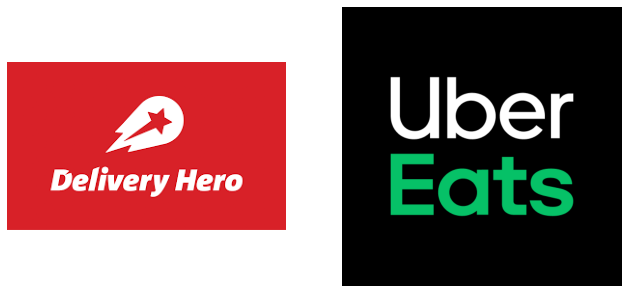

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

PATH = "/Users/colendi/Documents/myblog/images/posts/maximum-likelihood-estimation/"

# read images
img_A = mpimg.imread(PATH+'delivery_hero.png')
img_B = mpimg.imread(PATH+'uber_eats.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A);
ax[1].imshow(img_B);
ax[1].axis("off")   # turns off axes
ax[0].axis("off") 
plt.show()

Now back to our scenario :) Our supervisor assigned a task to us which is to predict if a customer is going to churn or not. [Churn rate](https://www.investopedia.com/terms/c/churnrate.asp) is a known problem for most of the businesses. There are various approaches to take when implementing a machine learning solution to churn problem. But let's assume a very simplistic scenario. We have a dataset of customers having two dimensions namely frequency of transactions (frequency) and days passed since last transaction (recency). Frequency of transactions is measured as the average number of days passed between transactions. Let's give an example to make our hypothetical scenario more realistic: 

Let $T_i$ represent the list of transactions of customer i. Assume we are given a list of transactions $T_i=[t_1,t_2...t_n]$ where $t_i=Y-m-d$ represents timestamp of the transaction. We represent frequency of transactions as $f$ measured in days, then: $$f=\frac{1}{N-1}\sum_{n=1}^{N-1}t_{n+1}-t_{n}$$ Let $r$ represents recency measured in days, then we have: $$r=c-t_n$$ where c represents current timestamp. Now let's visualize the dataset we have...

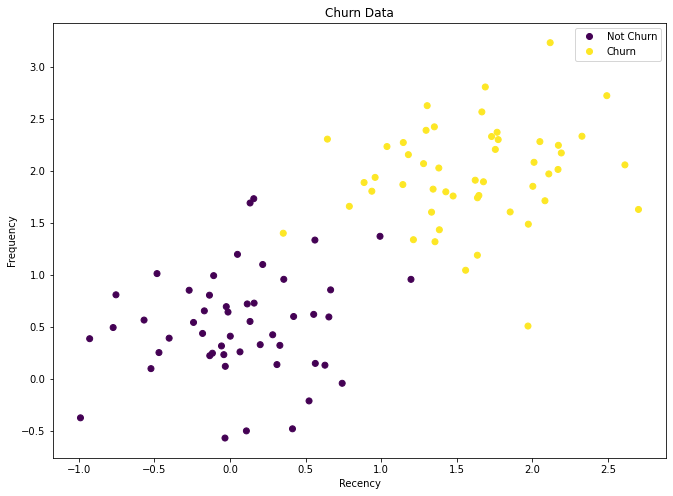

In [139]:
#!/usr/bin/python3

import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs



def generate_data(num_samples):
    '''
    assuming 2 dimensional features and just two generating functions
    ie make two blobs on an x,y plane
    '''
    
    cluster_std = ([.5, .5])
    features, labels = make_blobs(n_samples=num_samples,
                                  centers=[[0,0.5],[1.5,2]],
                                  n_features=2,
                                  cluster_std=cluster_std,
                                  center_box=(-2, 2),
                                  random_state=10)
    return features, labels




features,labels = generate_data(num_samples=100)
# plot training data
scatter = plt.scatter(features[:,0],features[:,1],c=labels)
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Churn','Churn'])
plt.title("Churn Data")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.show()


As you can see dimensions of our datasets have been scaled to fit a range. They are generated from two gaussian distributions on purpose. Customers with high frequency and high recency is labeled as churned. The definition of churn is usually subject to change in different domains. Here we can assume that business defines the definition of churned customers. Let's now build a classifier. The classifier we are going to build essentially consists of two models (i.e 2-D Gaussians). One model is churn model and the other one is not-churn model. When we get a new customer data point, we are going to calculate the likelihood of churn for both models i.e $p(\pmb{x}|\pmb{\theta})$ and assign the label that has the higher probability.

This approach assumes that data was generated by a process and we try to learn an approximation of the underlying process that created sample data points. Let's build the classifier now and see it in action!

import numpy as np
    

class GaussianClassifier:
    
    def fit(self,x: np.ndarray, y: np.ndarray) -> None:
        """
        Trains on data, i.e learns parameters of Gaussian for different classes
        Parameters
        ----------
        x: np.ndarray
            Numpy array of shape (n,d) where n = #observations and d = #dimension
        y: np.ndarray
            Numpy array of shape (n,) which represents labels
        Returns
        -------
        None
        """
        
        #set number of classes
        self.n_classes = len(set(y))
    
        #store list of means
        self.means = []
    
        #store list of inverse covariance matrices
        self.inverse_covariances = []
    
        # store list of scalars
        self.scalars = []
    
        # set number of data points
        self.n = x.shape[0]
    
        # set number of dimension
        self.d = x.shape[1]
    
        for i in range(self.n_classes):
    
            #filter data for this class
            data = np.array([x[j] for j in range(self.n) if y[j] == i])
    
            # find empirical mean of data
            emp_mean = np.mean(data,axis=0)
            emp_cov = np.cov(data,rowvar=False)
            #you may need to check if covariance matrix is positive definite here, if not give error
                                                     
            #find inverse covariance
            emp_cov_inverse = np.linalg.inv(emp_cov)
            scalar = 1/np.sqrt(((2*np.pi)**self.d)*np.linalg.det(emp_cov))
                                                     
            self.means.append(emp_mean)
            self.inverse_covariances.append(emp_cov_inverse)
            self.scalars.append(scalar)
                                                     
    def _calculate_likelihood(self, x: np.ndarray, i: int)->float:
        """
        Calculates likelihood p(x|theta) which is Gaussian
        Parameters
        ----------
        x: np.ndarray
            Numpy array of shape (1,d)
        i: int
            Label of the class
        Returns
        -------
        likelihood: float
            Likelihood p(x|theta) which is Gaussian
        """
        mean = self.means[i]
        cov_inverse = self.inverse_covariances[i]
        scalar = self.scalars[i]
        
        return scalar*(np.e**((-1/2)*np.dot(np.matmul(x-mean, cov_inverse), x-mean)))
                                                     
   
    def predict(self, x: np.ndarray) -> list:
        """
        Predicts label of the data point using likelihood p(x|theta) which is Gaussian. It assigns label that gives maximum likelihood
        Parameters
        ----------
        x: np.ndarray
            Numpy array of shape (1,d)
        Returns
        -------
        labels: list
            List of integers representation of the class
        """
        return np.array([np.argmax([self._calculate_likelihood(x[j],i) for i in range(self.n_classes)]) for j in range(x.shape[0])])
        
        


Now that we have defined our classifier, we can see that when we fit data i.e estimate parameters from data, we are calculating empirical estimates which are MLE estimates of parameters. This is what we saw at the begining of our post. Let's now see our classifier in action. For demo purposes, we are going to split data into train and test part. Then we are going to classify test data points!

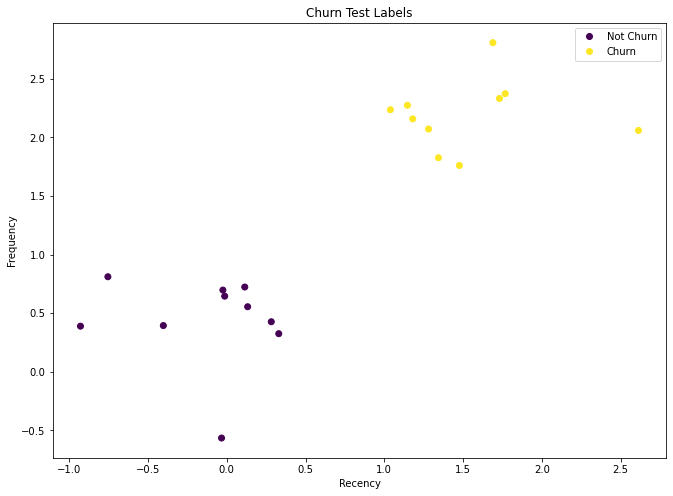

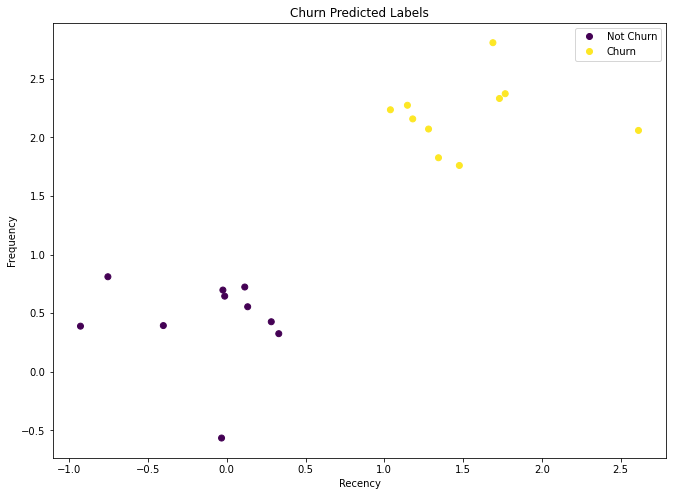

In [143]:
import numpy as np
from sklearn.model_selection import train_test_split


class GaussianClassifier:


    def fit(self,x: np.ndarray, y: np.ndarray) -> None:
        """
        Trains on data, i.e learns parameters of Gaussian for different classes
        Parameters
        ----------
        x: np.ndarray
            Numpy array of shape (n,d) where n = #observations and d = #dimension
        y: np.ndarray
            Numpy array of shape (n,) which represents labels
        Returns
        -------
        None
        """

        #set number of classes
        self.n_classes = len(set(y))

        #store list of means
        self.means = []

        #store list of inverse covariance matrices
        self.inverse_covariances = []

        # store list of scalars
        self.scalars = []

        # set number of data points
        self.n = x.shape[0]

        # set number of dimension
        self.d = x.shape[1]

        for i in range(self.n_classes):

            #filter data for this class
            data = np.array([x[j] for j in range(self.n) if y[j] == i])

            # find empirical mean of data
            emp_mean = np.mean(data,axis=0)
            emp_cov = np.cov(data,rowvar=False)
            if np.sum(np.linalg.eigvals(emp_cov) <= 0) != 0:
               print(f'Warning! Covariance matrix is not positive definite!\n')
               sys.exit()

            #find inverse covariance
            emp_cov_inverse = np.linalg.inv(emp_cov)
            scalar = 1/np.sqrt(((2*np.pi)**self.d)*np.linalg.det(emp_cov))

            self.means.append(emp_mean)
            self.inverse_covariances.append(emp_cov_inverse)
            self.scalars.append(scalar)

    def _calculate_likelihood(self, x: np.ndarray, i: int)->float:
        """
        Calculates likelihood p(x|theta) which is Gaussian
        Parameters
        ----------
        x: np.ndarray
            Numpy array of shape (1,d)
        i: int
            Label of the class
        Returns
        -------
        likelihood: float
            Likelihood p(x|theta) which is Gaussian
        """
        mean = self.means[i]
        cov_inverse = self.inverse_covariances[i]
        scalar = self.scalars[i]
        
        return scalar*(np.e**((-1/2)*np.dot(np.matmul(x-mean, cov_inverse), x-mean)))


    def predict(self, x: np.ndarray) -> list:
        """
        Predicts label of the data point using likelihood p(x|theta) which is Gaussian. It assigns label that gives maximum likelihood
        Parameters
        ----------
        x: np.ndarray
            Numpy array of shape (1,d)
        Returns
        -------
        labels: list
            List of integers representation of the class
        """
        return np.array([np.argmax([self._calculate_likelihood(x[j],i) for i in range(self.n_classes)]) for j in range(x.shape[0])])

    
(x_train, x_test, y_train, y_test) = train_test_split(
    features, labels, train_size=0.8, random_state=10)
gc = GaussianClassifier()
gc.fit(x_train, y_train)
scatter = plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Churn','Churn'])
plt.title("Churn Test Labels")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.show()


y_predicted = gc.predict(x_test)
scatter = plt.scatter(x_test[:,0],x_test[:,1],c=y_predicted)
plt.legend(handles=scatter.legend_elements()[0], labels=['Not Churn','Churn'])
plt.title("Churn Predicted Labels")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.show()




Yeeyyyyy! As you can see, we have correctly predicted churn labels of our test data. With that we just applied what we have covered theoretically to a practical example and built a machine learning model for churn prediction.

## Wrap Up

In this post, we saw that maximum likelihood estimation is a point estimation technique to estimate parameters of a model using data only. Understanding parameter estimation ,i.e training a model, is key to many ideas in machine learning! We have also built a machine learning model for churn prediction using MLE parameter estimates. Remember MLE uses data to estimate parameters. We didn't cover that but it is prone to overfitting. In order to eliminate overfitting you can use a strong prior distribution on parameters [MAP](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation). You can also apply a fully Bayesian approach to integrate out the parameters in posterior predictive distribution [Bayesian Inference](https://en.wikipedia.org/wiki/Bayesian_inference). With that, we have reached the end of this post, we have covered a lot and I really enjoyed going over a few important concepts with you. I hope that you enjoy the post as well :) If you have any questions about the post or data science in general, you can find me on [Linkedin](https://www.linkedin.com/in/koseoglubaran). I would highly appreciate to get any comment, question or just to have a chat about data science and topics around it with you! You can find the jupyter notebook that generated this post on [Github](https://github.com/bkoseoglu/mathematics-of-machine-learning) See you at the next one...